### Which Community Districts in NYC show the highest number of complaints?

In [68]:
import os
import pandas as pd
import numpy as np
import re
import statsmodels.formula.api as smf
import pylab as pl
%pylab inline


Populating the interactive namespace from numpy and matplotlib


In [3]:
# load dataset
df = pd.read_csv("/projects/open/NYCOpenData/nycopendata/data/erm2-nwe9/1446832678/erm2-nwe9")



/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (8,17,39,40,47,48) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,31911011,11/05/2015 02:59:15 AM,NaN,DOT,Department of Transportation,Street Condition,Pothole,NaN,11224,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.573431,-73.991742,"(40.57343122248129, -73.99174247588253)"
1,31908754,11/05/2015 02:09:49 AM,NaN,CHALL,CHALL,Opinion for the Mayor,HOUSING,NaN,NaN,NaN,...,NaN,NaN,NaN,1-1-1173130914,NaN,NaN,NaN,NaN,NaN,NaN
2,31910423,11/05/2015 02:06:51 AM,NaN,DPR,Department of Parks and Recreation,Root/Sewer/Sidewalk Condition,Trees and Sidewalks Program,Street,11234,1157 EAST 57 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.625004,-73.920726,"(40.62500363580505, -73.92072558378698)"
3,31909924,11/05/2015 02:02:20 AM,NaN,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,11218,722 EAST 4 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.634522,-73.974790,"(40.634522428879706, -73.97479041437481)"
4,31913310,11/05/2015 01:57:20 AM,11/05/2015 01:57:31 AM,HRA,HRA Benefit Card Replacement,Benefit Card Replacement,Medicaid,NYC Street Address,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Part 3

In [5]:
df.columns

Index([u'Unique Key', u'Created Date', u'Closed Date', u'Agency',
       u'Agency Name', u'Complaint Type', u'Descriptor', u'Location Type',
       u'Incident Zip', u'Incident Address', u'Street Name', u'Cross Street 1',
       u'Cross Street 2', u'Intersection Street 1', u'Intersection Street 2',
       u'Address Type', u'City', u'Landmark', u'Facility Type', u'Status',
       u'Due Date', u'Resolution Description',
       u'Resolution Action Updated Date', u'Community Board', u'Borough',
       u'X Coordinate (State Plane)', u'Y Coordinate (State Plane)',
       u'Park Facility Name', u'Park Borough', u'School Name',
       u'School Number', u'School Region', u'School Code',
       u'School Phone Number', u'School Address', u'School City',
       u'School State', u'School Zip', u'School Not Found',
       u'School or Citywide Complaint', u'Vehicle Type',
       u'Taxi Company Borough', u'Taxi Pick Up Location',
       u'Bridge Highway Name', u'Bridge Highway Direction', u'Road Ramp',

In [6]:
# check if all boroughs are represented in the data
df['Borough'].unique()

array(['BROOKLYN', 'Unspecified', 'STATEN ISLAND', 'MANHATTAN', 'BRONX',
       'QUEENS'], dtype=object)

In [15]:
#there are 6 unique values, all 5 boroughs and unspecified

In [7]:
df['Community Board'].unique()

array(['13 BROOKLYN', '0 Unspecified', '18 BROOKLYN', '12 BROOKLYN',
       '02 STATEN ISLAND', '08 MANHATTAN', '06 BROOKLYN', '10 BRONX',
       '06 MANHATTAN', '04 BROOKLYN', '04 QUEENS', '09 MANHATTAN',
       '14 BROOKLYN', '05 MANHATTAN', '02 MANHATTAN', '10 QUEENS',
       '07 QUEENS', '02 QUEENS', '11 BROOKLYN', '05 QUEENS', '05 BROOKLYN',
       '09 QUEENS', '12 MANHATTAN', '01 BROOKLYN', '11 MANHATTAN',
       '03 BRONX', '03 STATEN ISLAND', '08 BROOKLYN', '03 BROOKLYN',
       '07 MANHATTAN', '10 MANHATTAN', '04 BRONX', '01 MANHATTAN',
       '07 BRONX', '09 BRONX', '03 MANHATTAN', '13 QUEENS', '02 BRONX',
       '12 QUEENS', '16 BROOKLYN', '08 QUEENS', '04 MANHATTAN',
       '14 QUEENS', '10 BROOKLYN', '11 QUEENS', '06 BRONX', '08 BRONX',
       '05 BRONX', '15 BROOKLYN', '02 BROOKLYN', '12 BRONX', '03 QUEENS',
       '06 QUEENS', '01 STATEN ISLAND', '01 BRONX', '01 QUEENS',
       '17 BROOKLYN', '11 BRONX', 'Unspecified QUEENS', '09 BROOKLYN',
       'Unspecified MANHATTAN'

In [8]:
# number of community districts
len(df['Community Board'].unique())

77

In [9]:
#there should be only 59: mislabeled, errors, get rid of unspecified

In [10]:
df = df[df['Community Board'] != '0 Unspecified']
df = df[df['Community Board'] != 'Unspecified QUEENS']
df = df[df['Community Board'] != 'Unspecified MANHATTAN']
df = df[df['Community Board'] != 'Unspecified BROOKLYN']
df = df[df['Community Board'] != 'Unspecified BRONX']
df = df[df['Community Board'] != 'Unspecified STATEN ISLAND']
df = df[df['Community Board'] != '81 QUEENS']
df = df[df['Community Board'] != '55 BROOKLYN']
df = df[df['Community Board'] != '83 QUEENS']
df = df[df['Community Board'] != '28 BRONX']
df = df[df['Community Board'] != '80 QUEENS']
df = df[df['Community Board'] != '26 BRONX']
df = df[df['Community Board'] != '95 STATEN ISLAND']
df = df[df['Community Board'] != '82 QUEENS']
df = df[df['Community Board'] != '27 BRONX']
df = df[df['Community Board'] != '56 BROOKLYN']
df = df[df['Community Board'] != '84 QUEENS']

df['Community Board'].unique()


array(['13 BROOKLYN', '18 BROOKLYN', '12 BROOKLYN', '02 STATEN ISLAND',
       '08 MANHATTAN', '06 BROOKLYN', '10 BRONX', '06 MANHATTAN',
       '04 BROOKLYN', '04 QUEENS', '09 MANHATTAN', '14 BROOKLYN',
       '05 MANHATTAN', '02 MANHATTAN', '10 QUEENS', '07 QUEENS',
       '02 QUEENS', '11 BROOKLYN', '05 QUEENS', '05 BROOKLYN', '09 QUEENS',
       '12 MANHATTAN', '01 BROOKLYN', '11 MANHATTAN', '03 BRONX',
       '03 STATEN ISLAND', '08 BROOKLYN', '03 BROOKLYN', '07 MANHATTAN',
       '10 MANHATTAN', '04 BRONX', '01 MANHATTAN', '07 BRONX', '09 BRONX',
       '03 MANHATTAN', '13 QUEENS', '02 BRONX', '12 QUEENS', '16 BROOKLYN',
       '08 QUEENS', '04 MANHATTAN', '14 QUEENS', '10 BROOKLYN',
       '11 QUEENS', '06 BRONX', '08 BRONX', '05 BRONX', '15 BROOKLYN',
       '02 BROOKLYN', '12 BRONX', '03 QUEENS', '06 QUEENS',
       '01 STATEN ISLAND', '01 BRONX', '01 QUEENS', '17 BROOKLYN',
       '11 BRONX', '09 BROOKLYN', '07 BROOKLYN', '64 MANHATTAN'], dtype=object)

In [11]:
df = df[df['Community Board'] != '64 MANHATTAN']
df['Community Board'].unique()

array(['13 BROOKLYN', '18 BROOKLYN', '12 BROOKLYN', '02 STATEN ISLAND',
       '08 MANHATTAN', '06 BROOKLYN', '10 BRONX', '06 MANHATTAN',
       '04 BROOKLYN', '04 QUEENS', '09 MANHATTAN', '14 BROOKLYN',
       '05 MANHATTAN', '02 MANHATTAN', '10 QUEENS', '07 QUEENS',
       '02 QUEENS', '11 BROOKLYN', '05 QUEENS', '05 BROOKLYN', '09 QUEENS',
       '12 MANHATTAN', '01 BROOKLYN', '11 MANHATTAN', '03 BRONX',
       '03 STATEN ISLAND', '08 BROOKLYN', '03 BROOKLYN', '07 MANHATTAN',
       '10 MANHATTAN', '04 BRONX', '01 MANHATTAN', '07 BRONX', '09 BRONX',
       '03 MANHATTAN', '13 QUEENS', '02 BRONX', '12 QUEENS', '16 BROOKLYN',
       '08 QUEENS', '04 MANHATTAN', '14 QUEENS', '10 BROOKLYN',
       '11 QUEENS', '06 BRONX', '08 BRONX', '05 BRONX', '15 BROOKLYN',
       '02 BROOKLYN', '12 BRONX', '03 QUEENS', '06 QUEENS',
       '01 STATEN ISLAND', '01 BRONX', '01 QUEENS', '17 BROOKLYN',
       '11 BRONX', '09 BROOKLYN', '07 BROOKLYN'], dtype=object)

In [12]:
len(df['Community Board'].unique())

59

In [13]:
# remove unneeded columns
data = df.loc[:,["Unique Key","Complaint Type", "Community Board", "Borough"]]
data.head()

,Unique Key,Complaint Type,Community Board,Borough
0,31911011,Street Condition,13 BROOKLYN,BROOKLYN
2,31910423,Root/Sewer/Sidewalk Condition,18 BROOKLYN,BROOKLYN
3,31909924,Illegal Parking,12 BROOKLYN,BROOKLYN
5,31914148,Highway Condition,02 STATEN ISLAND,STATEN ISLAND
7,31912611,Noise - Commercial,08 MANHATTAN,MANHATTAN


In [14]:
counts = data.groupby('Community Board')['Complaint Type'].count()
counts

Community Board
01 BRONX             74631
01 BROOKLYN         185057
01 MANHATTAN         77974
01 QUEENS           171484
01 STATEN ISLAND    182713
02 BRONX             60257
02 BROOKLYN         121022
02 MANHATTAN        133860
02 QUEENS           114333
02 STATEN ISLAND    121132
03 BRONX             75134
03 BROOKLYN         197306
03 MANHATTAN        150296
03 QUEENS           122009
03 STATEN ISLAND    136487
04 BRONX            181953
04 BROOKLYN         139706
04 MANHATTAN        132660
04 QUEENS            99316
05 BRONX            161078
05 BROOKLYN         189765
05 MANHATTAN        142028
05 QUEENS           168570
06 BRONX             99547
06 BROOKLYN         114029
06 MANHATTAN        104249
06 QUEENS            90938
07 BRONX            185729
07 BROOKLYN         107031
07 MANHATTAN        151419
07 QUEENS           195961
08 BRONX             92733
08 BROOKLYN         141119
08 MANHATTAN        149076
08 QUEENS           123131
09 BRONX            147457
09 BROOKLYN 

In [15]:
data = pd.DataFrame(counts)
data.head()

,Complaint Type
Community Board,
01 BRONX,74631
01 BROOKLYN,185057
01 MANHATTAN,77974
01 QUEENS,171484
01 STATEN ISLAND,182713


In [18]:
data = data.reset_index()
data.head()

,index,Community Board,Complaint Type
0,0,01 BRONX,74631
1,1,01 BROOKLYN,185057
2,2,01 MANHATTAN,77974
3,3,01 QUEENS,171484
4,4,01 STATEN ISLAND,182713


## Part 4: Find variables correlated with number of complaints per comm district

### Demographic dataset

In [23]:
PUIDATA = os.getenv("PUIDATA")
PUIDATA = "/home/cusp/kal573/PUIdata"
df_pop = pd.read_csv(PUIDATA + "/Final_Demographics.csv")

In [24]:
df_pop.head()

,FIPS,cd_id,Total Population,Population Density (per sq. mile),% Total Population: Male,% Total Population: 18 to 24 Years,% Total Population: 25 to 34 Years,% Total Population: 35 to 44 Years,% Population 5 Years And Over: Speak Only English,% Population 5 Years And Over: Spanish or Spanish Creole,...,"Employed Civilian Population 16 Years And Over: Production, transportation, and material moving occupations: Production occupations","Employed Civilian Population 16 Years And Over: Production, transportation, and material moving occupations: Transportation and material moving occupations","% Employed Civilian Population 16 Years And Over: Management, professional, and related occupations",% Employed Civilian Population 16 Years And Over: Service occupations,% Employed Civilian Population 16 Years And Over: Sales and office occupations,"% Employed Civilian Population 16 Years And Over: Farming, fishing, and forestry occupations","% Employed Civilian Population 16 Years And Over: Construction, extraction, and maintenance occupations","% Employed Civilian Population 16 Years And Over: Production, transportation, and material moving occupations","% Employed Civilian Population 16 Years And Over: Production, transportation, and material moving occupations: Production occupations","% Employed Civilian Population 16 Years And Over: Production, transportation, and material moving occupations: Transportation and material moving occupations"
0,3603701,BX08,106737,31229.95006,46.65,10.73,15.04,11.32,46.80,39.24,...,665,1518,42.66,28.95,20.89,0.24,2.65,4.60,1.40,3.20
1,3603702,BX12,134644,19966.67839,46.35,11.35,14.29,12.57,73.09,18.19,...,1156,4174,29.57,33.98,20.40,0.00,7.08,8.97,1.95,7.02
2,3603703,BX10,121209,12913.81703,45.20,8.62,13.74,12.78,61.79,26.43,...,941,3433,36.20,22.85,25.09,0.00,7.68,8.18,1.76,6.42
3,3603704,BX11,135839,35677.95453,50.09,8.10,17.43,14.09,43.22,36.45,...,2189,5592,30.06,27.86,22.24,0.00,7.03,12.81,3.60,9.20
4,3603705,BX03,172247,39405.79222,44.72,14.24,14.89,12.38,36.82,54.24,...,1437,5436,16.80,41.00,22.29,0.03,8.45,11.43,2.39,9.04


In [25]:
df_pop.columns

Index([u'FIPS', u'cd_id', u'Total Population',
       u'Population Density (per sq. mile)', u'% Total Population: Male',
       u'% Total Population: 18 to 24 Years',
       u'% Total Population: 25 to 34 Years',
       u'% Total Population: 35 to 44 Years',
       u'% Population 5 Years And Over: Speak Only English',
       u'% Population 5 Years And Over: Spanish or Spanish Creole',
       ...
       u'Employed Civilian Population 16 Years And Over: Production, transportation, and material moving  occupations: Production occupations',
       u'Employed Civilian Population 16 Years And Over: Production, transportation, and material moving  occupations: Transportation and material moving occupations',
       u'% Employed Civilian Population 16 Years And Over: Management, professional, and related occupations',
       u'% Employed Civilian Population 16 Years And Over: Service occupations',
       u'% Employed Civilian Population 16 Years And Over: Sales and office occupations',
       

In [26]:
df_pop['cd_id'].unique()

array(['BX08', 'BX12', 'BX10', 'BX11', 'BX03', 'BX06', 'BX07', 'BX05',
       'BX04', 'BX09', 'BX01', 'BX02', 'MN12', 'MN09', 'MN10', 'MN11111',
       'MN08', 'MN07', 'MN05', 'MN04', 'MN06', 'MN03', 'MN01', 'MN02',
       'SI03', 'SI02', 'SI01', 'BK01', 'BK04', 'BK03', 'BK02', 'BK06',
       'BK08', 'BK16', 'BK05', 'BK18', 'BK17', 'BK09', 'BK07', 'BK10',
       'BK12', 'BK14', 'BK15', 'BK11', 'BK13', 'QN01', 'QN03', 'QN07',
       'QN11', 'QN13', 'QN08', 'QN04', 'QN06', 'QN02', 'QN05', 'QN09',
       'QN12', 'QN10', 'QN14'], dtype=object)

In [27]:
len(df_pop['cd_id'].unique())

59

In [28]:
#manhattan 11 = MN11111

In [29]:
len(df_pop['cd_id'].unique())

59

In [30]:
# create new column for residents over 18, most likely to call 311 (percentage of population)
df_pop['% call_pop'] = (df_pop['% Total Population: 18 to 24 Years'] + df_pop['% Total Population: 25 to 34 Years'] + df_pop['% Total Population: 35 to 44 Years'])
df_pop.head()

,FIPS,cd_id,Total Population,Population Density (per sq. mile),% Total Population: Male,% Total Population: 18 to 24 Years,% Total Population: 25 to 34 Years,% Total Population: 35 to 44 Years,% Population 5 Years And Over: Speak Only English,% Population 5 Years And Over: Spanish or Spanish Creole,...,"Employed Civilian Population 16 Years And Over: Production, transportation, and material moving occupations: Transportation and material moving occupations","% Employed Civilian Population 16 Years And Over: Management, professional, and related occupations",% Employed Civilian Population 16 Years And Over: Service occupations,% Employed Civilian Population 16 Years And Over: Sales and office occupations,"% Employed Civilian Population 16 Years And Over: Farming, fishing, and forestry occupations","% Employed Civilian Population 16 Years And Over: Construction, extraction, and maintenance occupations","% Employed Civilian Population 16 Years And Over: Production, transportation, and material moving occupations","% Employed Civilian Population 16 Years And Over: Production, transportation, and material moving occupations: Production occupations","% Employed Civilian Population 16 Years And Over: Production, transportation, and material moving occupations: Transportation and material moving occupations",% call_pop
0,3603701,BX08,106737,31229.95006,46.65,10.73,15.04,11.32,46.80,39.24,...,1518,42.66,28.95,20.89,0.24,2.65,4.60,1.40,3.20,37.09
1,3603702,BX12,134644,19966.67839,46.35,11.35,14.29,12.57,73.09,18.19,...,4174,29.57,33.98,20.40,0.00,7.08,8.97,1.95,7.02,38.21
2,3603703,BX10,121209,12913.81703,45.20,8.62,13.74,12.78,61.79,26.43,...,3433,36.20,22.85,25.09,0.00,7.68,8.18,1.76,6.42,35.14
3,3603704,BX11,135839,35677.95453,50.09,8.10,17.43,14.09,43.22,36.45,...,5592,30.06,27.86,22.24,0.00,7.03,12.81,3.60,9.20,39.62
4,3603705,BX03,172247,39405.79222,44.72,14.24,14.89,12.38,36.82,54.24,...,5436,16.80,41.00,22.29,0.03,8.45,11.43,2.39,9.04,41.51


In [31]:
# sum the population percentage that can call 311, by community district
sum_call_pop = df_pop.groupby('cd_id')['% call_pop'].sum()
sum_call_pop

cd_id
BK01       52.10
BK02       49.30
BK03       43.73
BK04       52.33
BK05       39.07
BK06       48.69
BK07       44.92
BK08       46.30
BK09       44.07
BK10       38.33
BK11       37.99
BK12       35.49
BK13       29.94
BK14       38.96
BK15       33.09
BK16       37.74
BK17       37.38
BK18       37.11
BX01       43.06
BX02       43.06
BX03       41.51
BX04       37.79
BX05       41.40
BX06       41.51
BX07       40.87
BX08       37.09
BX09       38.91
BX10       35.14
BX11       39.62
BX12       38.21
MN01       55.07
MN02       55.07
MN03       45.56
MN04       56.04
MN05       56.04
MN06       49.97
MN07       38.00
MN08       43.95
MN09       51.05
MN10       44.47
MN11111    43.83
MN12       45.48
QN01       52.12
QN02       47.51
QN03       43.64
QN04       42.89
QN05       39.42
QN06       34.53
QN07       36.45
QN08       38.72
QN09       41.81
QN10       36.60
QN11       33.00
QN12       37.69
QN13       35.49
QN14       29.78
SI01       38.95
SI02       32.81
SI03    

### Infrastructure dataset

In [32]:
PUIDATA = os.getenv("PUIDATA")
PUIDATA = "/home/cusp/kal573/PUIdata"
df_infr = pd.read_csv(PUIDATA + "/ACS_Computer_Use_and_Internet_2014_1Year_Estimate.csv")

In [33]:
df_infr.head()

,FIPS,Geographic Identifier,Qualifying Name,Households,Households: With An Internet Subscription,Households: Dial-Up Alone,Households: Dsl,Households: With Mobile Broadband,Households: Without Mobile Broadband,Households: Cable Modem,...,Households: Mobile Broadband Alone or With Dialup,Households: Internet Access Without A Subscription,Households: No Internet Access,% Households: With An Internet Subscription,Households.1,Households: Has A Computer,Households: With Dial-Up Internet Subscription Alone,Households: With A Broadband Internet Subscription,Households: Without An Internet Subscription,Households: No Computer
0,3603701,79500US3603701,"NYC-Bronx Community District 8--Riverdale, New...",42035,31795,444,2813,946,1867,19178,...,2168,2119,8121,75.64,42035,35048,404,30943,3701,6987
1,3603702,79500US3603702,"NYC-Bronx Community District 12--Wakefield, Ne...",44830,32243,178,849,405,444,18653,...,928,1891,10696,71.92,44830,36700,178,31435,5087,8130
2,3603703,79500US3603703,"NYC-Bronx Community District 10--Co-op City, N...",47050,32729,158,1863,398,1465,20044,...,639,2882,11439,69.56,47050,38700,158,32333,6209,8350
3,3603704,79500US3603704,NYC-Bronx Community District 11--Pelham Parkwa...,44922,32003,141,1478,474,1004,17917,...,1001,2722,10197,71.24,44922,37237,122,31278,5837,7685
4,3603705,79500US3603705,"NYC-Bronx Community District 3 & 6--Belmont, N...",57556,35503,88,1297,651,646,15847,...,1385,3312,18741,61.68,57556,42576,88,33408,9080,14980


In [34]:
df_infr.columns

Index([u'FIPS', u'Geographic Identifier', u'Qualifying Name', u'Households',
       u'Households: With An Internet Subscription',
       u'Households: Dial-Up Alone', u'Households: Dsl',
       u'Households: With Mobile Broadband',
       u'Households: Without Mobile Broadband', u'Households: Cable Modem',
       u'Households: With Mobile Broadband.1',
       u'Households: Without Mobile Broadband.1', u'Households: Fiber-Optic',
       u'Households: With Mobile Broadband.2',
       u'Households: Without Mobile Broadband.2',
       u'Households: Satellite Internet Service',
       u'Households: With Mobile Broadband.3',
       u'Households: Without Mobile Broadband.3',
       u'Households: Two or More Fixed Broadband Types, or Other',
       u'Households: With Mobile Broadband.4',
       u'Households: Without Mobile Broadband.4',
       u'Households: Mobile Broadband Alone or With Dialup',
       u'Households: Internet Access Without A Subscription',
       u'Households: No Internet Acc

In [35]:
df_infr['Qualifying Name'].unique()

array(['NYC-Bronx Community District 8--Riverdale, New York',
       'NYC-Bronx Community District 12--Wakefield, New York',
       'NYC-Bronx Community District 10--Co-op City, New York',
       'NYC-Bronx Community District 11--Pelham Parkway, New York',
       'NYC-Bronx Community District 3 & 6--Belmont, New York',
       'NYC-Bronx Community District 7--Bedford Park, New York',
       'NYC-Bronx Community District 5--Morris Heights, New York',
       'NYC-Bronx Community District 4--Concourse, New York',
       'NYC-Bronx Community District 9--Castle Hill, New York',
       'NYC-Bronx Community District 1 & 2--Hunts Point, New York',
       'NYC-Manhattan Community District 12--Washington Heights, New York',
       'NYC-Manhattan Community District 9--Hamilton Heights, New York',
       'NYC-Manhattan Community District 10--Central Harlem PUMA, New York',
       'NYC-Manhattan Community District 11--East Harlem PUMA, New York',
       'NYC-Manhattan Community District 8--Upper Eas

In [36]:
len(df_infr['Qualifying Name'].unique())

55

In [37]:
# households with computers
computer_raw = df_infr.groupby('Qualifying Name')['Households: Has A Computer'].sum()


In [38]:
# divide by total number of households to get true sum
household = df_infr.groupby('Qualifying Name')['Households'].sum()
household

Qualifying Name
NYC-Bronx Community District 1 & 2--Hunts Point, New York                                   104382
NYC-Bronx Community District 10--Co-op City, New York                                        47050
NYC-Bronx Community District 11--Pelham Parkway, New York                                    44922
NYC-Bronx Community District 12--Wakefield, New York                                         44830
NYC-Bronx Community District 3 & 6--Belmont, New York                                       115112
NYC-Bronx Community District 4--Concourse, New York                                          47935
NYC-Bronx Community District 5--Morris Heights, New York                                     44699
NYC-Bronx Community District 7--Bedford Park, New York                                       47252
NYC-Bronx Community District 8--Riverdale, New York                                          42035
NYC-Bronx Community District 9--Castle Hill, New York                                        

In [39]:
# % of households with computers by community district
computer = computer_raw/household
computer

Qualifying Name
NYC-Bronx Community District 1 & 2--Hunts Point, New York                                   0.749957
NYC-Bronx Community District 10--Co-op City, New York                                       0.822529
NYC-Bronx Community District 11--Pelham Parkway, New York                                   0.828926
NYC-Bronx Community District 12--Wakefield, New York                                        0.818648
NYC-Bronx Community District 3 & 6--Belmont, New York                                       0.739732
NYC-Bronx Community District 4--Concourse, New York                                         0.723730
NYC-Bronx Community District 5--Morris Heights, New York                                    0.769525
NYC-Bronx Community District 7--Bedford Park, New York                                      0.823224
NYC-Bronx Community District 8--Riverdale, New York                                         0.833781
NYC-Bronx Community District 9--Castle Hill, New York                      

In [40]:
df_infr['% households with computers'] = df_infr['Households: Has A Computer'] / df_infr['Households']
df_infr.head()

,FIPS,Geographic Identifier,Qualifying Name,Households,Households: With An Internet Subscription,Households: Dial-Up Alone,Households: Dsl,Households: With Mobile Broadband,Households: Without Mobile Broadband,Households: Cable Modem,...,Households: Internet Access Without A Subscription,Households: No Internet Access,% Households: With An Internet Subscription,Households.1,Households: Has A Computer,Households: With Dial-Up Internet Subscription Alone,Households: With A Broadband Internet Subscription,Households: Without An Internet Subscription,Households: No Computer,% households with computers
0,3603701,79500US3603701,"NYC-Bronx Community District 8--Riverdale, New...",42035,31795,444,2813,946,1867,19178,...,2119,8121,75.64,42035,35048,404,30943,3701,6987,0.833781
1,3603702,79500US3603702,"NYC-Bronx Community District 12--Wakefield, Ne...",44830,32243,178,849,405,444,18653,...,1891,10696,71.92,44830,36700,178,31435,5087,8130,0.818648
2,3603703,79500US3603703,"NYC-Bronx Community District 10--Co-op City, N...",47050,32729,158,1863,398,1465,20044,...,2882,11439,69.56,47050,38700,158,32333,6209,8350,0.822529
3,3603704,79500US3603704,NYC-Bronx Community District 11--Pelham Parkwa...,44922,32003,141,1478,474,1004,17917,...,2722,10197,71.24,44922,37237,122,31278,5837,7685,0.828926
4,3603705,79500US3603705,"NYC-Bronx Community District 3 & 6--Belmont, N...",57556,35503,88,1297,651,646,15847,...,3312,18741,61.68,57556,42576,88,33408,9080,14980,0.739732


## Part 5: Merging Datasets

In [41]:
# first add a new column to each dataframe to make community district names uniform

In [42]:
# first dataset
data['Community Board'].unique()

array(['01 BRONX', '01 BROOKLYN', '01 MANHATTAN', '01 QUEENS',
       '01 STATEN ISLAND', '02 BRONX', '02 BROOKLYN', '02 MANHATTAN',
       '02 QUEENS', '02 STATEN ISLAND', '03 BRONX', '03 BROOKLYN',
       '03 MANHATTAN', '03 QUEENS', '03 STATEN ISLAND', '04 BRONX',
       '04 BROOKLYN', '04 MANHATTAN', '04 QUEENS', '05 BRONX',
       '05 BROOKLYN', '05 MANHATTAN', '05 QUEENS', '06 BRONX',
       '06 BROOKLYN', '06 MANHATTAN', '06 QUEENS', '07 BRONX',
       '07 BROOKLYN', '07 MANHATTAN', '07 QUEENS', '08 BRONX',
       '08 BROOKLYN', '08 MANHATTAN', '08 QUEENS', '09 BRONX',
       '09 BROOKLYN', '09 MANHATTAN', '09 QUEENS', '10 BRONX',
       '10 BROOKLYN', '10 MANHATTAN', '10 QUEENS', '11 BRONX',
       '11 BROOKLYN', '11 MANHATTAN', '11 QUEENS', '12 BRONX',
       '12 BROOKLYN', '12 MANHATTAN', '12 QUEENS', '13 BROOKLYN',
       '13 QUEENS', '14 BROOKLYN', '14 QUEENS', '15 BROOKLYN',
       '16 BROOKLYN', '17 BROOKLYN', '18 BROOKLYN'], dtype=object)

In [43]:
# create dictionary for borough names
b_name = {'BRONX':'BX', 'BROOKLYN':'BK', 'MANHATTAN':'MN', 'QUEENS':'QN', 'STATEN ISLAND':'SI'}

In [44]:
data['cd'] = [b_name[i[3:]] + i[:2] for i in data['Community Board']]

data.head()

,index,Community Board,Complaint Type,cd
0,0,01 BRONX,74631,BX01
1,1,01 BROOKLYN,185057,BK01
2,2,01 MANHATTAN,77974,MN01
3,3,01 QUEENS,171484,QN01
4,4,01 STATEN ISLAND,182713,SI01


In [45]:
# second dataset
data2 = df_pop.loc[:,["cd_id", "% call_pop"]]
data2.head()

,cd_id,% call_pop
0,BX08,37.09
1,BX12,38.21
2,BX10,35.14
3,BX11,39.62
4,BX03,41.51


In [46]:
# rename cd_id to cd
data2.rename(columns = {'cd_id':'cd'}, inplace = True)
data2.head()

,cd,% call_pop
0,BX08,37.09
1,BX12,38.21
2,BX10,35.14
3,BX11,39.62
4,BX03,41.51


In [47]:
# third dataset
# first split the string in the column containing community districts
cd_string = df_infr['Qualifying Name'].str.split(' ')
# create series
cd_string = pd.Series(cd_string)

In [48]:
for i in range(len(cd_string)):
    df_infr.loc[i,'borough'] = str(cd_string[i][0])[4:]


In [49]:
# create new column
df_infr['cd_name'] = df_infr['borough']
df_infr.head()

,FIPS,Geographic Identifier,Qualifying Name,Households,Households: With An Internet Subscription,Households: Dial-Up Alone,Households: Dsl,Households: With Mobile Broadband,Households: Without Mobile Broadband,Households: Cable Modem,...,% Households: With An Internet Subscription,Households.1,Households: Has A Computer,Households: With Dial-Up Internet Subscription Alone,Households: With A Broadband Internet Subscription,Households: Without An Internet Subscription,Households: No Computer,% households with computers,borough,cd_name
0,3603701,79500US3603701,"NYC-Bronx Community District 8--Riverdale, New...",42035,31795,444,2813,946,1867,19178,...,75.64,42035,35048,404,30943,3701,6987,0.833781,Bronx,Bronx
1,3603702,79500US3603702,"NYC-Bronx Community District 12--Wakefield, Ne...",44830,32243,178,849,405,444,18653,...,71.92,44830,36700,178,31435,5087,8130,0.818648,Bronx,Bronx
2,3603703,79500US3603703,"NYC-Bronx Community District 10--Co-op City, N...",47050,32729,158,1863,398,1465,20044,...,69.56,47050,38700,158,32333,6209,8350,0.822529,Bronx,Bronx
3,3603704,79500US3603704,NYC-Bronx Community District 11--Pelham Parkwa...,44922,32003,141,1478,474,1004,17917,...,71.24,44922,37237,122,31278,5837,7685,0.828926,Bronx,Bronx
4,3603705,79500US3603705,"NYC-Bronx Community District 3 & 6--Belmont, N...",57556,35503,88,1297,651,646,15847,...,61.68,57556,42576,88,33408,9080,14980,0.739732,Bronx,Bronx


In [50]:
# replace each borough name with the two letter abbreviation
df_infr['cd_name'] = df_infr['cd_name'].str.replace(pat='Brooklyn', repl='BK')
df_infr['cd_name'] = df_infr['cd_name'].str.replace(pat='Manhattan', repl='MN')
df_infr['cd_name'] = df_infr['cd_name'].str.replace(pat='Staten', repl='SI')
df_infr['cd_name'] = df_infr['cd_name'].str.replace(pat='Bronx', repl='BX')
df_infr['cd_name'] = df_infr['cd_name'].str.replace(pat='Queens', repl='QN')

In [51]:
df_infr.head()

,FIPS,Geographic Identifier,Qualifying Name,Households,Households: With An Internet Subscription,Households: Dial-Up Alone,Households: Dsl,Households: With Mobile Broadband,Households: Without Mobile Broadband,Households: Cable Modem,...,% Households: With An Internet Subscription,Households.1,Households: Has A Computer,Households: With Dial-Up Internet Subscription Alone,Households: With A Broadband Internet Subscription,Households: Without An Internet Subscription,Households: No Computer,% households with computers,borough,cd_name
0,3603701,79500US3603701,"NYC-Bronx Community District 8--Riverdale, New...",42035,31795,444,2813,946,1867,19178,...,75.64,42035,35048,404,30943,3701,6987,0.833781,Bronx,BX
1,3603702,79500US3603702,"NYC-Bronx Community District 12--Wakefield, Ne...",44830,32243,178,849,405,444,18653,...,71.92,44830,36700,178,31435,5087,8130,0.818648,Bronx,BX
2,3603703,79500US3603703,"NYC-Bronx Community District 10--Co-op City, N...",47050,32729,158,1863,398,1465,20044,...,69.56,47050,38700,158,32333,6209,8350,0.822529,Bronx,BX
3,3603704,79500US3603704,NYC-Bronx Community District 11--Pelham Parkwa...,44922,32003,141,1478,474,1004,17917,...,71.24,44922,37237,122,31278,5837,7685,0.828926,Bronx,BX
4,3603705,79500US3603705,"NYC-Bronx Community District 3 & 6--Belmont, N...",57556,35503,88,1297,651,646,15847,...,61.68,57556,42576,88,33408,9080,14980,0.739732,Bronx,BX


In [52]:
df_infr['cd_num'] = df_infr['Qualifying Name'].str.extract('(\d+)', expand=True)
df_infr['cd_num'] = df_infr['cd_num'].apply(lambda x: x.zfill(2))
df_infr.head()

,FIPS,Geographic Identifier,Qualifying Name,Households,Households: With An Internet Subscription,Households: Dial-Up Alone,Households: Dsl,Households: With Mobile Broadband,Households: Without Mobile Broadband,Households: Cable Modem,...,Households.1,Households: Has A Computer,Households: With Dial-Up Internet Subscription Alone,Households: With A Broadband Internet Subscription,Households: Without An Internet Subscription,Households: No Computer,% households with computers,borough,cd_name,cd_num
0,3603701,79500US3603701,"NYC-Bronx Community District 8--Riverdale, New...",42035,31795,444,2813,946,1867,19178,...,42035,35048,404,30943,3701,6987,0.833781,Bronx,BX,08
1,3603702,79500US3603702,"NYC-Bronx Community District 12--Wakefield, Ne...",44830,32243,178,849,405,444,18653,...,44830,36700,178,31435,5087,8130,0.818648,Bronx,BX,12
2,3603703,79500US3603703,"NYC-Bronx Community District 10--Co-op City, N...",47050,32729,158,1863,398,1465,20044,...,47050,38700,158,32333,6209,8350,0.822529,Bronx,BX,10
3,3603704,79500US3603704,NYC-Bronx Community District 11--Pelham Parkwa...,44922,32003,141,1478,474,1004,17917,...,44922,37237,122,31278,5837,7685,0.828926,Bronx,BX,11
4,3603705,79500US3603705,"NYC-Bronx Community District 3 & 6--Belmont, N...",57556,35503,88,1297,651,646,15847,...,57556,42576,88,33408,9080,14980,0.739732,Bronx,BX,03


In [53]:
# join the two new columns to create cd column for merging
df_infr['cd'] = df_infr[['cd_name', 'cd_num']].apply(lambda x: ''.join(x), axis = 1)
df_infr.head()

,FIPS,Geographic Identifier,Qualifying Name,Households,Households: With An Internet Subscription,Households: Dial-Up Alone,Households: Dsl,Households: With Mobile Broadband,Households: Without Mobile Broadband,Households: Cable Modem,...,Households: Has A Computer,Households: With Dial-Up Internet Subscription Alone,Households: With A Broadband Internet Subscription,Households: Without An Internet Subscription,Households: No Computer,% households with computers,borough,cd_name,cd_num,cd
0,3603701,79500US3603701,"NYC-Bronx Community District 8--Riverdale, New...",42035,31795,444,2813,946,1867,19178,...,35048,404,30943,3701,6987,0.833781,Bronx,BX,08,BX08
1,3603702,79500US3603702,"NYC-Bronx Community District 12--Wakefield, Ne...",44830,32243,178,849,405,444,18653,...,36700,178,31435,5087,8130,0.818648,Bronx,BX,12,BX12
2,3603703,79500US3603703,"NYC-Bronx Community District 10--Co-op City, N...",47050,32729,158,1863,398,1465,20044,...,38700,158,32333,6209,8350,0.822529,Bronx,BX,10,BX10
3,3603704,79500US3603704,NYC-Bronx Community District 11--Pelham Parkwa...,44922,32003,141,1478,474,1004,17917,...,37237,122,31278,5837,7685,0.828926,Bronx,BX,11,BX11
4,3603705,79500US3603705,"NYC-Bronx Community District 3 & 6--Belmont, N...",57556,35503,88,1297,651,646,15847,...,42576,88,33408,9080,14980,0.739732,Bronx,BX,03,BX03


In [54]:
# remove unneeded columns
data3 = df_infr.loc[:,["cd", "% households with computers"]]
data3.head()

,cd,% households with computers
0,BX08,0.833781
1,BX12,0.818648
2,BX10,0.822529
3,BX11,0.828926
4,BX03,0.739732


In [55]:
# perform dataset merges
data_final = data.merge(data2, on = 'cd')
data_final = data_final.merge(data3, on = 'cd')
data_final.head()

,index,Community Board,Complaint Type,cd,% call_pop,% households with computers
0,0,01 BRONX,74631,BX01,43.06,0.749957
1,0,01 BRONX,74631,BX01,43.06,0.749957
2,1,01 BROOKLYN,185057,BK01,52.10,0.836006
3,2,01 MANHATTAN,77974,MN01,55.07,0.951343
4,2,01 MANHATTAN,77974,MN01,55.07,0.951343


In [73]:
data_final = data_final.drop_duplicates()

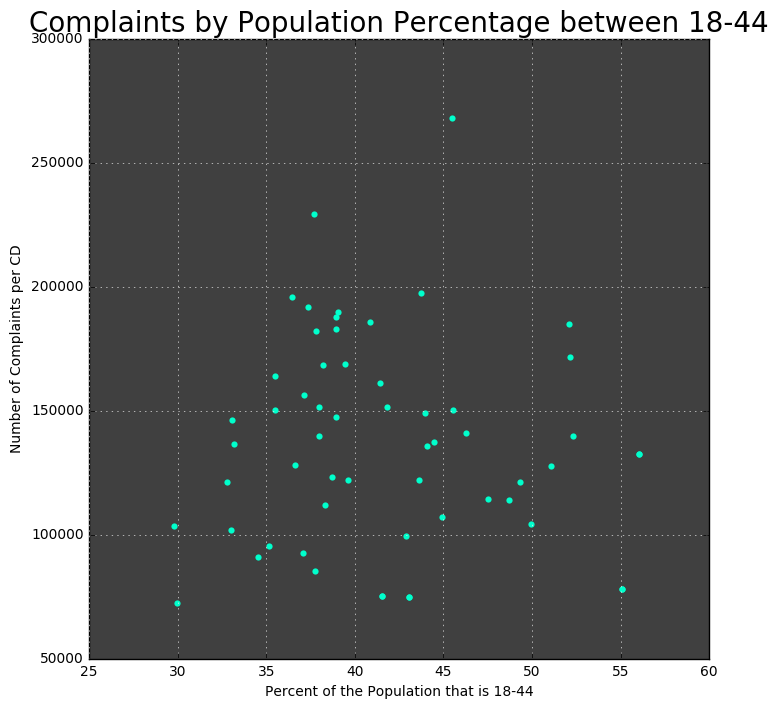

In [66]:
# plot complaint counts by % population that can call 311
ax = data_final.plot(x = '% call_pop', y = 'Complaint Type', kind = 'scatter', lw=0, figsize = (8,8), color = '#00ffcc')
ax.set_axis_bgcolor("#404040")
pl.ylabel('Number of Complaints per CD')
pl.xlabel('Percent of the Population that is 18-44')
pl.grid(color = '#e6e6e6')
pl.title("Complaints by Population Percentage between 18-44", fontsize = 20)

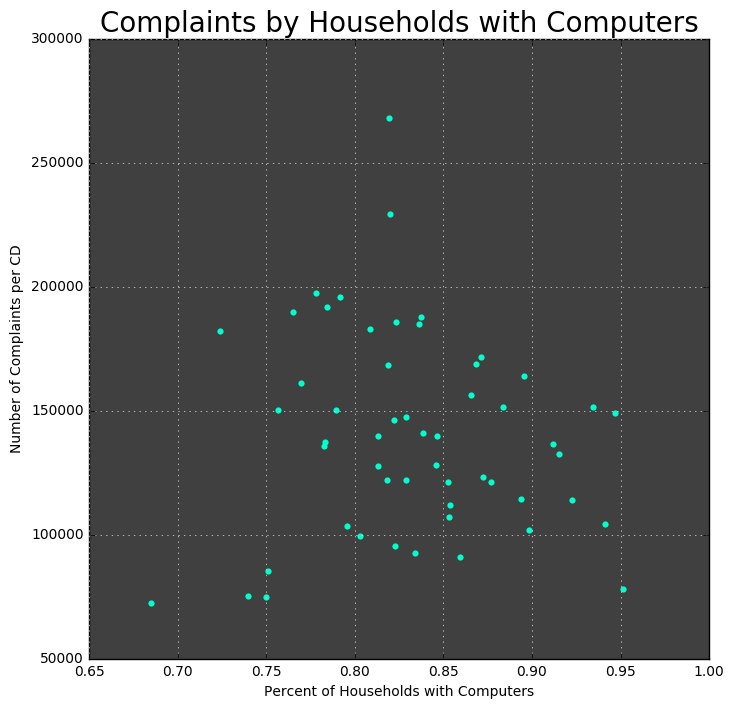

In [75]:
# plot complaint counts by % population that can call 311
ax = data_final.plot(x = '% households with computers', y = 'Complaint Type', kind = 'scatter', lw=0, figsize = (8,8), color = '#00ffcc')
ax.set_axis_bgcolor("#404040")
pl.ylabel('Number of Complaints per CD')
pl.xlabel('Percent of Households with Computers')
pl.grid(color = '#e6e6e6')
pl.title("Complaints by Households with Computers", fontsize = 20)

### Conclusions

According to my analysis of the merged datasets, more 311 complaints are received from younger populations and households without computers.